# An Introduction to RDKit for Cheminformatics

Import the necessary Python libraries

In [1]:
from rdkit import Chem #RDKit Chemistry
from rdkit.Chem.Draw import IPythonConsole #RDKit drawing
from rdkit.Chem import Draw #RDKit drawing
# A few settings to improve the quality of structures 
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools #Add the ability to add a molecule to a dataframegrid
# allow RDKit-Mol objects to be displayed as images
PandasTools.RenderImagesInAllDataFrames(images=True)
import pandas as pd

Create a molecule (benzene) from a SMILES string

In [2]:
mol = Chem.MolFromSmiles("c1ccccc1")

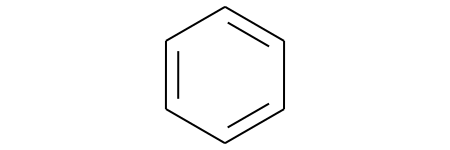

In [3]:
mol

In [4]:
glvc = Chem.MolFromSmiles("CN1CCN(Cc2ccc(cc2)C(=O)Nc3ccc(C)c(Nc4nccc(n4)c5cccnc5)c3)CC1")

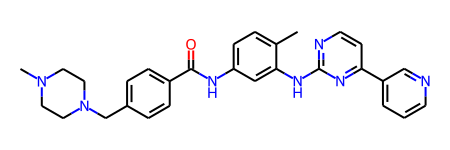

In [5]:
glvc

Accessing basic molecular properties.

In [6]:
n_atoms_ori = glvc.GetNumAtoms()

# Impicit hydrogens are not included in the Mol objects generated from SMILES. Use the function Chem.AddHs(mol) 
# if they are needed.
glvc_explicitH = Chem.AddHs(glvc)
n_atoms = glvc_explicitH.GetNumAtoms()
n_heavy = glvc_explicitH.GetNumHeavyAtoms()

# python f-string f"..." provides a simple way to format outputs.
# Variables in curly brackets {var} will be turned into strings for display.
print(f"The original Mol object has {n_atoms_ori} atoms in total.\nGleevec consists of {n_atoms} atoms, \
{n_heavy} of which are heavy atoms.")

The original Mol object has 37 atoms in total.
Gleevec consists of 68 atoms, 37 of which are heavy atoms.


Read SMILES from file into a Pandas dataframe. 

In [12]:
# read file into dataframe, then calculate rdkit descriptors

bace1_file = "https://raw.githubusercontent.com/anunesalves/machinelearning-wise23/main/datasets/BACE1_inh.csv"
bace1_df = pd.read_csv(bace1_file)

bace1_df.head(5)

,SMILES,pIC50,Class
0,OC(C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(N...,10.522879,1
1,S(=O)(=O)(CC(NC(OCn1nc(cc1C)C)=O)C(=O)NC(C(O)C...,9.522879,1
2,OC(C(NC(=O)C(NC(=O)C(NC(=O)C([NH3+])CCC(=O)[O-...,9.522879,1
3,O=C(NCCC(C)(C)C)C(Cc1cc2cc(ccc2nc1N)-c1ccccc1C)C,9.187087,1
4,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901,1


,SMILES,pIC50,Class,mol_obj
0,OC(C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(N...,10.522879,1,
1,S(=O)(=O)(CC(NC(OCn1nc(cc1C)C)=O)C(=O)NC(C(O)C...,9.522879,1,
2,OC(C(NC(=O)C(NC(=O)C(NC(=O)C([NH3+])CCC(=O)[O-...,9.522879,1,
3,O=C(NCCC(C)(C)C)C(Cc1cc2cc(ccc2nc1N)-c1ccccc1C)C,9.187087,1,
4,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901,1,

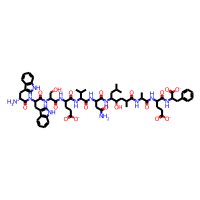
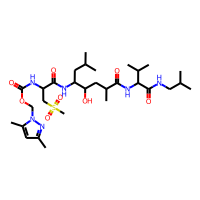
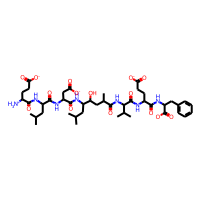
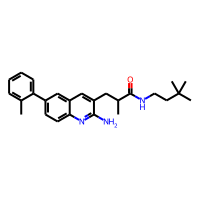
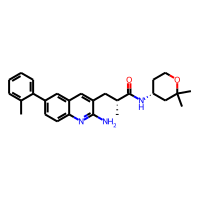

In [15]:
PandasTools.AddMoleculeColumnToFrame(bace1_df, smilesCol='SMILES', molCol='mol_obj')

bace1_df.head(5)

Let's add columns with molecular weight and LogP to the dataframe.

In [16]:
from rdkit.Chem.Descriptors import MolWt, MolLogP
bace1_df['MW'] = [MolWt(x) for x in bace1_df.mol_obj]
bace1_df['LogP'] = [MolLogP(x) for x in bace1_df.mol_obj]

,SMILES,pIC50,Class,mol_obj,MW,LogP
0,OC(C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(N...,10.522879,1,,1350.495,-5.56230
1,S(=O)(=O)(CC(NC(OCn1nc(cc1C)C)=O)C(=O)NC(C(O)C...,9.522879,1,,658.863,1.42784
2,OC(C(NC(=O)C(NC(=O)C(NC(=O)C([NH3+])CCC(=O)[O-...,9.522879,1,,933.046,-6.16620
3,O=C(NCCC(C)(C)C)C(Cc1cc2cc(ccc2nc1N)-c1ccccc1C)C,9.187087,1,,403.570,5.52342
4,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901,1,,431.580,5.04482

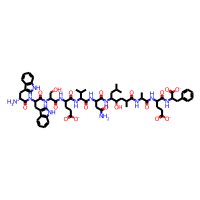
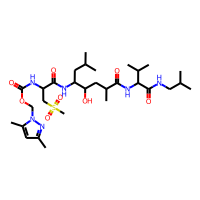
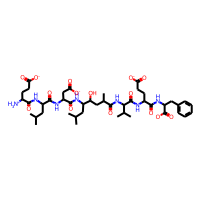
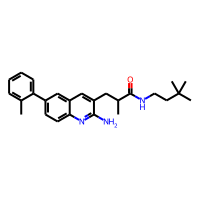
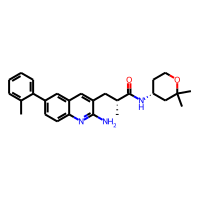

In [17]:
bace1_df.head(5)